# Topics in Python
## Week 7 Homework

This weeks homework will consist of practicing your ability to gather data using web scraping and BeautifulSoup. You will also be tasked with performing some text analytics on a work you find from the [Project Gutenberg](https://www.gutenberg.org/) website.

**100 Points**

### **Submission Details:**
This assignment is due February 2nd at 11:00pm.

Please submit your homework by committing it to your repository and pushing it to GitHub.
- In the source control tab, you will see the files that you have changed.
- Make sure to write a commit message.
- Click the checkbox next to the files you want to commit.
- Click the dropdown arrow next to the box that says "Commit" and select "Commit and Push".
- Ensure that your homework is in the repository on GitHub by checking the website.

### **Academic Honesty:**
- You are expected to complete the homework on your own.
- The use of generative AI is not allowed on this assignment.
- Do not copy and paste code from any resource
- The use of Python Documentation is allowed, but other online resources are not allowed.

### **Grading:**
- Your code will be graded on the basis of its correctness and its quality.
- Please make sure your code is clean and readable.
- If a question requires a written response, make sure to use markdown to clearly distinguish your answer.
- Please make sure you write comments in your code when necessary.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

# Question 1:

Choose a Wikipedia article of your choosing. The only requirement is that the article must have at least 2 tables on the site.

Using `BeautifulSoup`, extract the data from the tables on the Wikipedia page and store the data in a `pandas` dataframe.

In [2]:
r= requests.get('https://en.wikipedia.org/wiki/College_lacrosse')
soup= BeautifulSoup(r.text, "html.parser")
tables = soup.find_all("table", {"class": "wikitable"})

table1 = tables[0]
rows = table1.find_all("tr")

table_list = []

header_row = []
for data in rows[0].find_all("th"):
    header_row.append(data.text.strip())

# table_list.append(header_row)

for row in rows[1:]:
    row_list = []
    for data in row.find_all("td"):
        row_list.append(data.text.strip())
    table_list.append(row_list)

df = pd.DataFrame(table_list)
df.columns= header_row
df


,,Division I,Division II,Division III
0,Lacrosse (Equivalency),12.6,10.8,-
1,Ice Hockey (Equivalency),18,13.5,-
2,Basketball (Headcount),13,10,-
3,Soccer (Equivalency),9.9,9,-
4,Football (Headcount in FBS only),85 (FBS)63 (FCS),36,-
5,Baseball (Equivalency),11.7,9,-


# Question 2:

Using the data you extracted in Question 1, clean the data and perform some exploratory data analysis:
- What is the shape of the data?
- What are the data types?
- Are there any missing values? If so, deal with them in some way
- Are there any columns that you can drop because they are not useful?

In [3]:
df.shape # 6X4
df.dtypes# objects
df.values # no missing values 
## D3 collumn is not useful because D3 does not offer scholarships 
df.columns


Index(['', 'Division I', 'Division II', 'Division III'], dtype='object')

# Question 3:

Visualize the data in some way. I would like to see 2, professional-looking plots that are **useful**.

<Axes: xlabel='sport', ylabel='scholarships D1'>

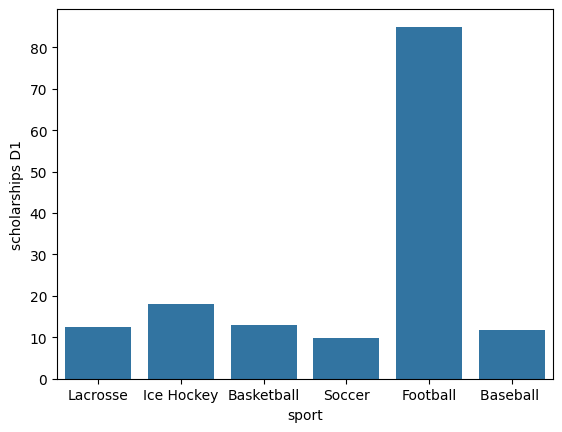

In [4]:
import seaborn as sns
df1 = {"sport": df[""], 
       "scholarships D1": df["Division I"],
       "scholarships D2": df["Division II"]}
df2= pd.DataFrame(df1)
a= pd.read_csv("./df2.csv")
a1=pd.DataFrame(a)

a1["scholarships D1"]= pd.to_numeric(a1["scholarships D1"])
a1["scholarships D2"]= pd.to_numeric(a1["scholarships D2"])
sns.barplot(a1, x="sport"  , y="scholarships D1" )

<Axes: xlabel='sport', ylabel='scholarships D2'>

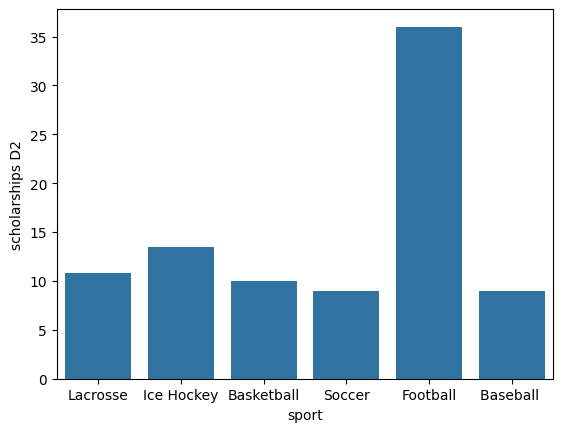

In [5]:
sns.barplot(a1, x="sport", y= "scholarships D2")

# Question 4:

Store these cleaned dataframes as .csv files in the `homework/` folder.

# Question 5:

Go to the [Gutenberg Project website](https://www.gutenberg.org/ebooks/search/?sort_order=downloads) and find a book that you would like to analyze. Please download the `.txt` file of that book and store it in the `homework/` folder.

# Question 6:

Using the `nltk` tokenizer, tokenize the text of the book you downloaded in Question 5.

In [6]:

import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag


with open("../homework/Shakespeare.txt", encoding="UTF-8") as f:
    shakespeare = f.read()
shakespeare_sents = sent_tokenize(shakespeare)[5:-118]
ss2 = [word_tokenize(sent) for sent in shakespeare_sents]



# Question 7:

Write a function which takes the tokenized text and creates a bag of words. The function should return a dictionary where the keys are the words in the text and the values are the frequency of the word.

In [7]:
wnl = WordNetLemmatizer()
def lemma_counts(doc):
    counts = {}
    for sent in doc:
        for word in sent:
            lemma = wnl.lemmatize(word)
            if lemma in counts.keys():
                counts[lemma] += 1
            else:
                counts[lemma] = 1

    return counts
shakespeare_counts = lemma_counts(ss2)
shakespeare_counts = dict(sorted(shakespeare_counts.items(),key=lambda x:x[1],reverse=True))
shakespeare_counts

{',': 94550,
 '.': 86086,
 '’': 26324,
 'the': 25532,
 'I': 23492,
 'and': 20044,
 'a': 18330,
 'to': 17302,
 'of': 17170,
 ';': 12918,
 'you': 12791,
 'my': 11404,
 '?': 11396,
 'in': 11270,
 'not': 9357,
 'that': 8954,
 'is': 8920,
 's': 8538,
 'And': 8352,
 'me': 8213,
 '!': 7805,
 'with': 7438,
 'it': 7176,
 'his': 6948,
 'be': 6843,
 'your': 6356,
 'for': 6210,
 'this': 5849,
 'have': 5810,
 'he': 5575,
 'him': 5467,
 'd': 5153,
 'thou': 4853,
 'will': 4845,
 'The': 4659,
 'her': 4347,
 'so': 4316,
 '[': 4255,
 ']': 4253,
 'thy': 3900,
 'but': 3791,
 'all': 3739,
 'do': 3512,
 ':': 3411,
 'To': 3405,
 'thee': 3386,
 'are': 3359,
 'shall': 3359,
 'That': 3262,
 'on': 3222,
 'by': 3178,
 'But': 2938,
 'no': 2912,
 'we': 2910,
 'our': 2876,
 'What': 2688,
 'll': 2623,
 'A': 2508,
 'from': 2508,
 'love': 2471,
 'at': 2467,
 'lord': 2451,
 'good': 2422,
 'O': 2416,
 'what': 2398,
 'she': 2302,
 'Enter': 2297,
 'more': 2271,
 'come': 2256,
 'am': 2222,
 'wa': 2219,
 'their': 2205,
 'wou

In [8]:
df = pd.DataFrame(shakespeare_counts, index=["count"]).T

# Question 8:

Create a professional-looking bar plot of word frequency in descending order. What do you notice?

<Axes: xlabel='None', ylabel='count'>

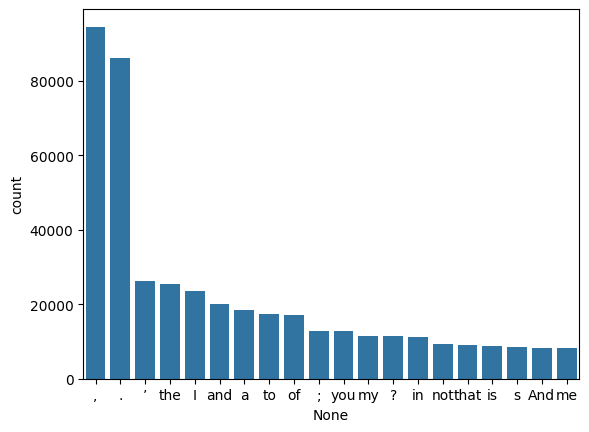

In [9]:
df["count"]=pd.to_numeric(df["count"])
df1= df.head(20)
sns.barplot(df1, x=df1.index, y=df1["count"])
## periods, spaces, and commas are the most common as expected with the bing the first word to appear on the list 


# Question 9:

Choose a level on which you'd like to analyze the sentiment of the work. Using that level's appropriate tokenizer, tokenize the text and present a sentiment-score for each element in that level.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


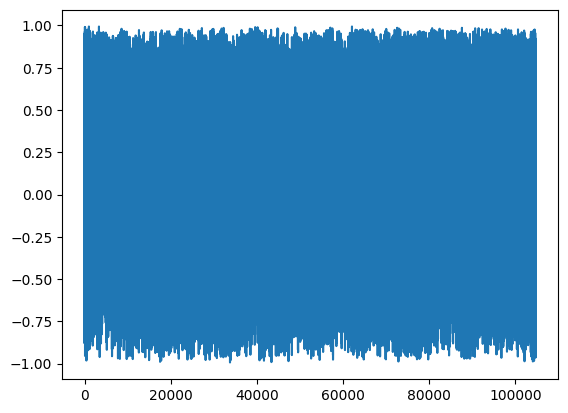

In [10]:
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
sa= SentimentIntensityAnalyzer()
def plot_sentiments(s):
    g= [i for i in range(len(s))]
    f= []

    for ss in s: 
        word = sa.polarity_scores(ss)
        f.append(word["compound"])

    return g, f
GX,FX = plot_sentiments(shakespeare_sents)
plt.plot( GX , FX)


# Question 10:

Convert your bag of words into a Dataframe, where the index is the word and the only column is the count. Using the `nltk` lemmatizer. Add a column of word lemmas into that Dataframe. Please print the top 5 rows by frequency.

In [15]:
l1= []
for i in list(shakespeare_counts.keys()): 
    l1.append(wnl.lemmatize(i))

df["lemma"] = l1
df.head(5)

,count,lemma
",",94550,","
.,86086,.
’,26324,’
the,25532,the
I,23492,I


# Extra Credit (10 pts)
**AI is allowed ONLY on this extra credit**

Using whatever resources you would like, including generative AI, create some visualization of the text. You ***MUST*** use a class or function from `nltk` that we have not used yet.

# Pledge

Please write out the following pledge in the markdown cell below:

***On my honor, I have neither given nor received help on this assignment.***